In [1]:
from AnastrisTNG import TNGsimulation,TNGtools,Anatools
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex'])

In [2]:
import gal1d

### 载入需要拟合的数据

In [3]:
BATHPATH='/home/dumin/IllustrisTNG/TNG50-1/output/'
snap99=TNGsimulation.Snapshot(BasePath=BATHPATH,Snap=99)

In [4]:
sub= snap99.load_particle(10)
sub.physical_units()
sub.face_on(alignwith='star',rmax=8)

In [5]:
dmr99 = sub.r(0.99,calfor='dm',calpa='mass')
pr = TNGtools.Profile(sub.dm,ndim=3,rmax=dmr99,rmin=3)
rdm = pr['rbins'][pr['density']>0]
rhodm = pr['density'][pr['density']>0]

In [8]:
sub.R_vir(200)

SimArray(141.41602346, 'kpc')

### 拟合profile，有些profile参数过多，需要将BOUND范围设置小一些

In [17]:
gal1d.DoublePowerLawProfile.BOUND['alpha']=[0,5]
gal1d.DoublePowerLawProfile.BOUND['beta']=[0,5]
gal1d.DoublePowerLawProfile.BOUND['gamma']=[0,5]
dou,jic = gal1d.DoublePowerLawProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in dou.keys():
    print(i,dou[i])
dou.formular()

density_scale_radius 41125049.693979025
scale_radius 3.76852294170206
alpha 1.4151366070295024
beta 2.255423759287844
gamma 3.0417783223408206


In [18]:
nfw,jic = gal1d.NFWProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in nfw.keys():
    print(i,nfw[i])
nfw.formular()

scale_radius 7.104948666650216
density_scale_radius 41125049.69397903


In [19]:
gnfw,jic = gal1d.GNFWProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in gnfw.keys():
    print(i,gnfw[i])
gnfw.formular()

density_scale_radius 10047016.821684932
scale_radius 11.162779453504111
gamma 1.5150636300731013


In [20]:

ein,jic = gal1d.EinastoProfile.fit(rdm,rhodm,use_analytical_jac=False)
for i in ein.keys():
    print(i,ein[i])
ein.formular()

density_scale_radius 38718.056384187636
scale_radius 64.72460260812241
Einasto_index 6.416704965458951


### 半径以内的所有质量

In [12]:
np.log10(gnfw.enclosed_mass(200))

11.618638988138187

In [13]:
np.log10(nfw.enclosed_mass(200))

11.649428337572358

In [14]:
np.log10(sub.dm['mass'].sum())

SimArray(11.38051447, 'Msol')

In [15]:
np.log10(ein.enclosed_mass(200))

11.687656852686585

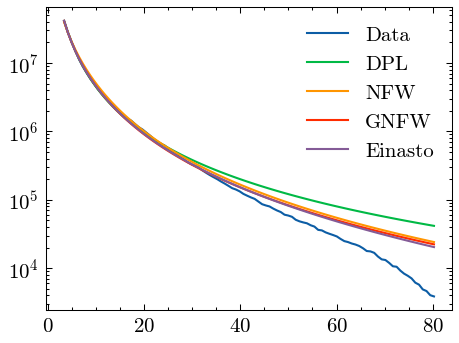

In [16]:
plt.figure(dpi=150)
plt.plot(rdm,rhodm,label='Data')
plt.plot(rdm,dou(rdm),label='DPL')
plt.plot(rdm,nfw(rdm),label='NFW')
plt.plot(rdm,gnfw(rdm),label='GNFW')
plt.plot(rdm,ein(rdm),label='Einasto')
plt.legend()
plt.yscale('log')

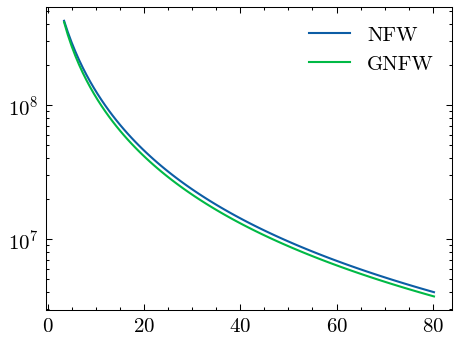

In [21]:
plt.figure(dpi=150)
plt.plot(rdm,nfw.density_2d(rdm),label='NFW')
plt.plot(rdm,gnfw.density_2d(rdm.view(np.ndarray)),label='GNFW')
plt.legend()
plt.yscale('log')
#plt.xscale('log')

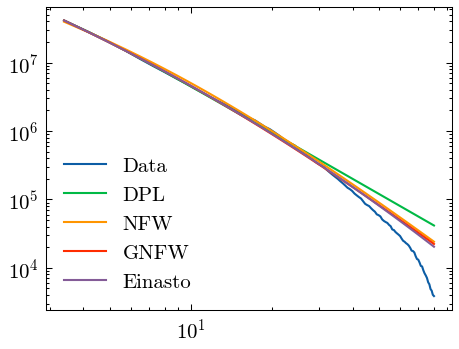

In [22]:
plt.figure(dpi=150)
plt.plot(rdm,rhodm,label='Data')
plt.plot(rdm,dou(rdm),label='DPL')
plt.plot(rdm,nfw(rdm),label='NFW')
plt.plot(rdm,gnfw(rdm),label='GNFW')
plt.plot(rdm,ein(rdm),label='Einasto')
plt.legend()
plt.yscale('log')
plt.xscale('log')

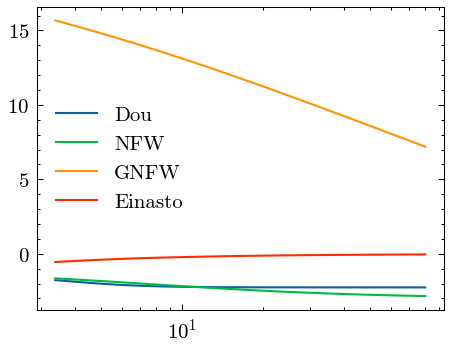

In [23]:
plt.figure(dpi=150)
plt.plot(rdm,dou.logarithmic_slope(rdm),label='Dou')
plt.plot(rdm,nfw.logarithmic_slope(rdm),label='NFW')
plt.plot(rdm,gnfw.logarithmic_slope(rdm),label='GNFW')
plt.plot(rdm,ein.logarithmic_slope(rdm),label='Einasto')
plt.legend()
#plt.yscale('log')
plt.xscale('log')

In [24]:
starR99 = sub.R(0.95,calfor='star',calpa='mass')
pR = TNGtools.Profile(sub.s,ndim=2,rmax=starR99,rmin=1)
Rstar = pR['rbins'][pR['density']>0]
denstar = pR['density'][pR['density']>0]

### 拟合以及表达式

In [25]:
gal1d.SersicProfile.BOUND['n']=[0.2,20]

ser,jic =gal1d.SersicProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in ser.keys():
    print(i,ser[i])
ser.formular()

n 12.799835738892224
r_e 2.573680695238497
I_e 224799719.43613234


In [26]:
exp,jic =gal1d.ExponentialProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in exp.keys():
    print(i,exp[i])
exp.formular()

h 2.44359451799347
I_0 956407914.1597048


### 所有质量

In [27]:
np.log10(ser.total_mass())

10.77562203667167

In [28]:
np.log10(exp.total_mass())

10.55488131386407

In [29]:
np.log10(sub.s['mass'].sum())

SimArray(10.78662145, 'Msol')

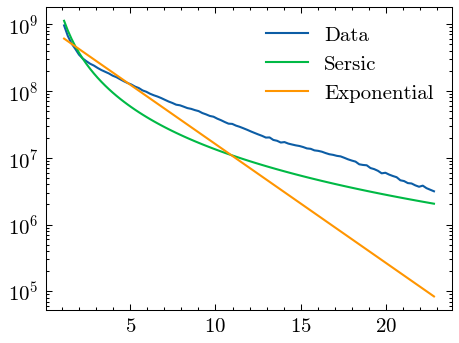

In [30]:
plt.figure(dpi=150)
plt.plot(Rstar,denstar,label='Data')
plt.plot(Rstar,ser(Rstar),label='Sersic')
plt.plot(Rstar,exp(Rstar),label='Exponential')
plt.legend()
plt.yscale('log')

## 拟合多成分的曲线，用MultiProfiles，add_profile

In [31]:
Ser_Exp = gal1d.MultiProfiles()
gal1d.SersicProfile.BOUND['n'] = [0,8]
Ser_Exp.add_profile(gal1d.SersicProfile)
Ser_Exp.add_profile(gal1d.ExponentialProfile)
Ser_Exp.fit(Rstar,denstar,use_analytical_jac=True)

(array([7.02796060e+00, 3.35667421e+00, 1.05135094e+08, 1.40662573e+08,
        6.33597525e+00, 1.18616333e-01, 2.02503241e-01]),
 array([[ 6.11450203e+00, -2.28653242e+01,  1.35897662e-07,
         -7.54621089e-09, -1.60729369e+00,  1.42876145e+01,
         -1.06147044e+00],
        [-2.28653242e+01,  8.73198460e+01, -5.16468554e-07,
          2.61672764e-08,  6.62175060e+00, -5.42989741e+01,
          3.68076024e+00],
        [ 1.35897662e-07, -5.16468554e-07,  3.05817191e-15,
         -1.58451791e-16, -3.84547004e-08,  3.21521216e-07,
         -2.22882592e-08],
        [-7.54621089e-09,  2.61672764e-08, -1.58451791e-16,
          1.19818816e-17,  1.05765507e-09, -1.66588452e-08,
          1.68540346e-09],
        [-1.60729369e+00,  6.62175060e+00, -3.84547004e-08,
          1.05765507e-09,  8.30660302e-01, -4.04293886e+00,
          1.48772772e-01],
        [ 1.42876145e+01, -5.42989741e+01,  3.21521216e-07,
         -1.66588452e-08, -4.04293886e+00,  3.38031659e+01,
         -2.343

(1000000.0, 1000000000.0)

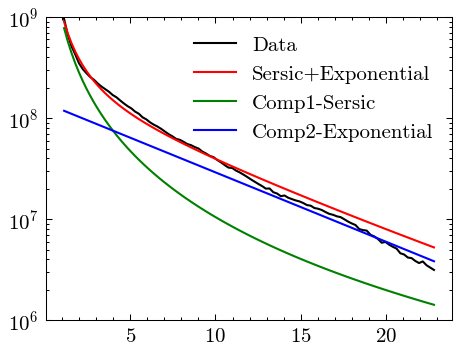

In [33]:
plt.figure(dpi=150)
plt.plot(Rstar,denstar,label='Data',c='k')
plt.plot(Rstar,Ser_Exp(Rstar),label='Sersic+Exponential',c='r')
plt.plot(Rstar,Ser_Exp['c1']*Ser_Exp['p1'](Rstar),label='Comp1-Sersic',c='g')
plt.plot(Rstar,Ser_Exp['c2']*Ser_Exp['p2'](Rstar),label='Comp2-Exponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e6,1e9)

### 半径以内的质量，以及各个成分的质量占比

In [34]:
np.log10(sub.s['mass'].sum())

SimArray(10.78662145, 'Msol')

In [35]:
np.log10(Ser_Exp.enclosed_mass(20))

10.76925375322323

In [36]:
np.array(Ser_Exp.components_enclosed_mass(20))/Ser_Exp.enclosed_mass(20)

array([0.5032274, 0.4967726])

In [37]:
Dou_Exp = gal1d.MultiProfiles()
Dou_Exp.add_profile(gal1d.ExponentialProfile)
Dou_Exp.add_profile(gal1d.ExponentialProfile)
Dou_Exp.fit(Rstar,denstar,use_analytical_jac=True)

(array([4.88771417e+08, 2.53007188e+00, 2.13806349e+08, 4.88693154e+00,
        6.94524122e-01, 2.68580641e-01]),
 array([[ 3.93340661e-17,  2.33510695e-08, -2.17656403e-16,
          6.39268344e-08,  1.92253672e-08, -4.65363149e-08],
        [ 2.33510695e-08,  1.46593663e+01, -1.30905701e-07,
          3.74898542e+01,  1.14133354e+01, -2.79884666e+01],
        [-2.17656403e-16, -1.30905701e-07,  1.20860652e-15,
         -3.53361765e-07, -1.06384229e-07,  2.58407714e-07],
        [ 6.39268344e-08,  3.74898542e+01, -3.53361765e-07,
          1.05051182e+02,  3.12456095e+01, -7.55509792e+01],
        [ 1.92253672e-08,  1.14133354e+01, -1.06384229e-07,
          3.12456095e+01,  9.39681000e+00, -2.27456206e+01],
        [-4.65363149e-08, -2.79884666e+01,  2.58407714e-07,
         -7.55509792e+01, -2.27456206e+01,  5.52492028e+01]]))

(1000000.0, 1000000000.0)

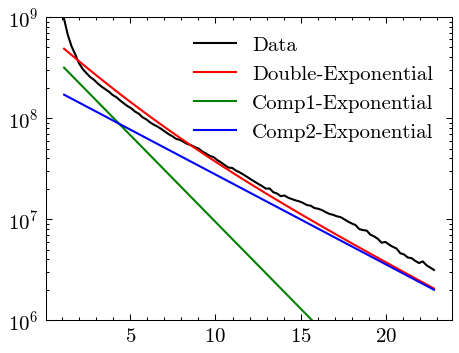

In [38]:
plt.figure(dpi=150)
plt.plot(Rstar,denstar,label='Data',c='k')
plt.plot(Rstar,Dou_Exp(Rstar),label='Double-Exponential',c='r')
plt.plot(Rstar,Dou_Exp['c1']*Dou_Exp['p1'](Rstar),label='Comp1-Exponential',c='g')
plt.plot(Rstar,Dou_Exp['c2']*Dou_Exp['p2'](Rstar),label='Comp2-Exponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e6,1e9)

In [39]:
Dou_Ser = gal1d.MultiProfiles()
Dou_Ser.add_profile(gal1d.SersicProfile)
Dou_Ser.add_profile(gal1d.SersicProfile)
Dou_Ser.fit(Rstar,denstar,use_analytical_jac=True)

(array([8.00000000e+00, 1.10969136e+00, 3.14391131e+06, 8.00000000e+00,
        2.28285811e+01, 6.43761903e+06, 5.07949708e-23, 1.57809331e-03]),
 array([[ 7.53735701e+09,  3.79502562e+09,  1.70770039e+03,
         -1.91866099e+07,  1.54006077e+09, -2.27393168e+01,
          5.36885833e+09, -1.46387101e+08],
        [ 3.79502562e+09,  1.98196421e+09,  8.37494398e+02,
         -9.84884678e+06,  7.85867014e+08, -1.15953079e+01,
          2.63300801e+09, -7.46461960e+07],
        [ 1.70770039e+03,  8.37494398e+02,  3.93919849e-04,
         -4.28829958e+00,  3.45659354e+02, -5.10628471e-06,
          1.23844900e+03, -3.28723252e+01],
        [-1.91866099e+07, -9.84884678e+06, -4.28829958e+00,
          4.93514819e+04, -3.94837989e+06,  5.82766023e-02,
         -1.34820330e+07,  3.75162670e+05],
        [ 1.54006077e+09,  7.85867014e+08,  3.45659354e+02,
         -3.94837989e+06,  3.16220783e+08, -4.66785025e+00,
          1.08672231e+09, -3.00498502e+07],
        [-2.27393168e+01, -1.15953

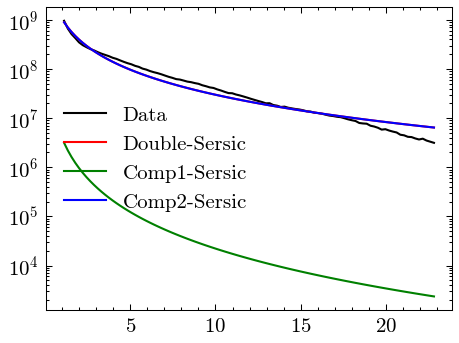

In [40]:
plt.figure(dpi=150)
plt.plot(Rstar,denstar,label='Data',c='k')
plt.plot(Rstar,Dou_Ser(Rstar),label='Double-Sersic',c='r')
plt.plot(Rstar,Dou_Ser.components_profile(Rstar)[0],label='Comp1-Sersic',c='g')
plt.plot(Rstar,Dou_Ser.components_profile(Rstar)[1],label='Comp2-Sersic',c='b')
plt.legend()
plt.yscale('log')
#plt.ylim(1e6,1e9)